## Working with India's DIGIPIN in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/14_DIGIPIN.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/14_DIGIPIN.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/14_DIGIPIN.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/14_DIGIPIN.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### Latlon to DIGIPIN

In [2]:
from vgrid.conversion.latlon2dggs import latlon2digipin

lat = 17.414718
lon = 78.482992
res = 10
digipin_id = latlon2digipin(lat, lon, res)
digipin_id

'422-2PL-9857'

### DIGIPIN to Polygon

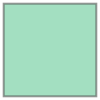

In [3]:
from vgrid.conversion.dggs2geo.digipin2geo import digipin2geo

digipin_geo = digipin2geo(digipin_id)
digipin_geo

### DIGIPIN to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.digipin2geo import digipin2geojson

digipin_geojson = digipin2geojson(digipin_id)
# digipin_geojson

### Vector to DIGIPIN

Processing features: 100%|██████████| 1/1 [00:00<00:00, 11.50it/s]


<Axes: >

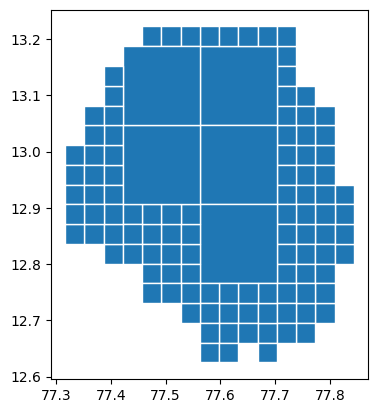

In [2]:
from vgrid.conversion.vector2dggs.vector2digipin import vector2digipin

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/india_polygon.geojson"
vector_to_digipin = vector2digipin(
    file_path,
    compact=True,
    resolution=5,
    topology=False,
    predicate="intersects",
    output_format="gpd",
)
# Visualize the output

vector_to_digipin.plot(edgecolor="white")

### DIGIPIN Compact

<Axes: >

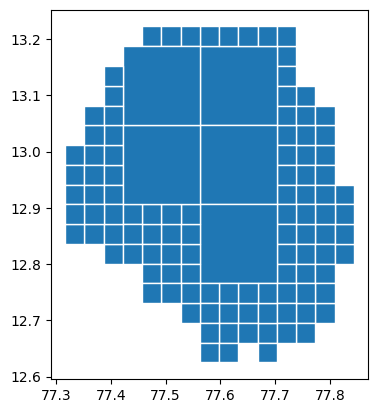

In [3]:
from vgrid.conversion.dggscompact.digipincompact import digipincompact

digipin_compacted = digipincompact(
    vector_to_digipin, digipin_id="digipin", output_format="gpd"
)
digipin_compacted.plot(edgecolor="white")

### DIGIPIN Expand

<Axes: >

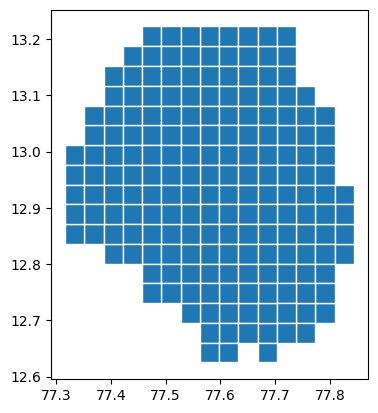

In [4]:
from vgrid.conversion.dggscompact.digipincompact import digipinexpand

digipin_expanded = digipinexpand(vector_to_digipin, resolution=5, output_format="gpd")
digipin_expanded.plot(edgecolor="white")

### DIGIPIN Binning

<Axes: >

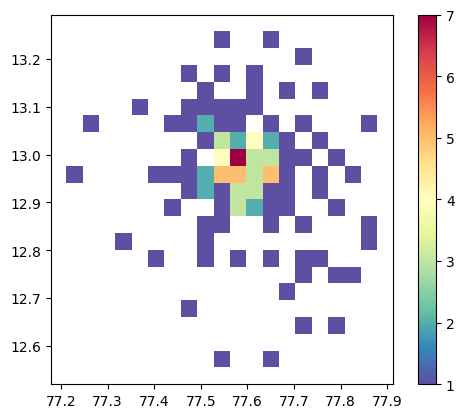

In [8]:
from vgrid.binning.digipinbin import digipinbin

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/india_point.geojson"
stats = "count"
digipin_bin = digipinbin(
    file_path,
    resolution=5,
    stats=stats,
    output_format="gpd",
)
digipin_bin.plot(
    column=stats,  # numeric column to base the colors on
    cmap="Spectral_r",  # color scheme (matplotlib colormap)
    legend=True,
    linewidth=0.2,  # boundary width (optional)
)

### Raster to DIGIPIN

#### Download and open raster

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


india_rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 191, 'height': 125, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(9.384238219892975e-05, 0.0, 72.99933512,
       0.0, -9.384238399999845e-05, 19.098565477)}


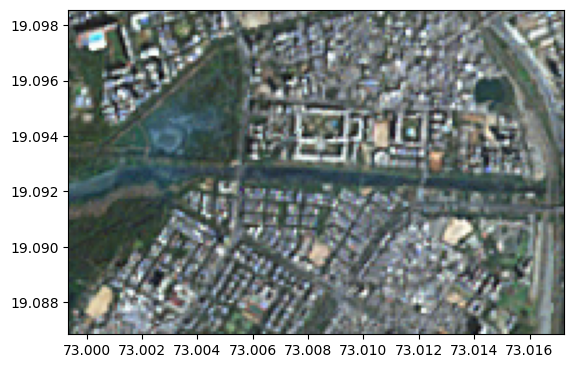

<Axes: >

In [9]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/india_rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, "r")
print(src.meta)
show(src)

#### Convert raster to DIGIPIN

In [10]:
# %pip install folium

In [ ]:
from vgrid.conversion.raster2dggs.raster2digipin import raster2digipin

raster_to_digipin = raster2digipin(raster_file, resolution=8, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=25)

digipin_layer = folium.GeoJson(
    raster_to_digipin,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["digipin", "band_1", "band_2", "band_3"],
        aliases=["DIGIPIN ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(digipin_layer.get_bounds())

# Display the map
m

Converting raster to DIGIPIN: 100%|██████████| 726/726 [00:00<00:00, 65161.56 cells/s]


### DIGIPIN Generator

<Axes: >

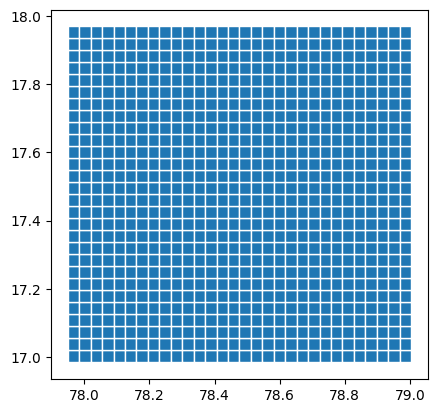

In [1]:
from vgrid.generator.digipingrid import digipingrid

bbox = [77.95, 17.01, 79.0, 17.98]
digipin_grid = digipingrid(resolution=5, bbox=bbox, output_format="gpd")
digipin_grid.plot(edgecolor="white")

### DIGIPIN Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [13]:
from vgrid.stats import digipinstats

digipinstats("m")

resolution  number_of_cells  avg_edge_len_m  avg_cell_area_m2         cls_m
0           1               16   968549.418022      9.380880e+11  1.093226e+06
1           2              256   242137.354505      5.863050e+10  2.732280e+05
2           3             4096    60534.338626      3.664406e+09  6.830577e+04
3           4            65536    15133.584657      2.290254e+08  1.707642e+04
4           5          1048576     3783.396164      1.431409e+07  4.269105e+03
5           6         16777216      945.849041      8.946304e+05  1.067276e+03
6           7        268435456      236.462260      5.591440e+04  2.668191e+02
7           8       4294967296       59.115565      3.494650e+03  6.670477e+01
8           9      68719476736       14.778891      2.184156e+02  1.667619e+01
9          10    1099511627776        3.694723      1.365098e+01  4.169048e+00